In [46]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, Point
import numpy as np

In [4]:
df = pd.read_csv('../data/external/hj_andrews/plot_data/TV010_Study Location Information_2017-11-09.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 11 columns):
DBCODE                      173 non-null object
LOCATION_CODE               173 non-null object
KEYWORD_NAME                173 non-null object
WEST_BOUND_COORD_decdeg     168 non-null float64
EAST_BOUND_COORD_decdeg     168 non-null float64
NORTH_BOUND_COORD_decdeg    168 non-null float64
SOUTH_BOUND_COORD_decdeg    168 non-null float64
ELEVATION_MAX_meters        73 non-null float64
ELEVATION_MIN_meters        73 non-null float64
SLOPE_percent               34 non-null float64
ASPECT_degrees              29 non-null float64
dtypes: float64(8), object(3)
memory usage: 14.9+ KB


In [6]:
df.head()

,DBCODE,LOCATION_CODE,KEYWORD_NAME,WEST_BOUND_COORD_decdeg,EAST_BOUND_COORD_decdeg,NORTH_BOUND_COORD_decdeg,SOUTH_BOUND_COORD_decdeg,ELEVATION_MAX_meters,ELEVATION_MIN_meters,SLOPE_percent,ASPECT_degrees
0,TV010,RS01,Reference Stand RS01; H.J. Andrews EF; Willame...,-122.258821,-122.256948,44.202968,44.201770,559.0,453.0,61.71,163.0
1,TV010,RS02,Reference Stand RS02; H.J. Andrews EF; Willame...,-122.244050,-122.242509,44.218696,44.217588,535.0,468.0,32.90,237.0
2,TV010,RS03,Reference Stand RS03; H.J. Andrews EF; Willame...,-122.159804,-122.157874,44.259177,44.258196,987.0,956.0,24.35,195.0
3,TV010,RS04,Reference Stand RS04; H.J. Andrews EF; Willame...,-122.137691,-122.136822,44.273367,44.272743,1312.0,1276.0,43.61,278.0
4,TV010,RS05,Reference Stand RS05; H.J. Andrews EF; Willame...,-122.202966,-122.202966,44.221835,44.221835,908.0,908.0,2.76,95.0


In [ ]:
df['Coordinates'] = list(zip(WEST_BOUND_COORD_decdeg	EAST_BOUND_COORD_decdeg	NORTH_BOUND_COORD_decdeg	SOUTH_BOUND_COORD_decdeg))

In [7]:
west = df.WEST_BOUND_COORD_decdeg
east = df.EAST_BOUND_COORD_decdeg
north = df.NORTH_BOUND_COORD_decdeg
south = df.SOUTH_BOUND_COORD_decdeg

In [8]:
list1 = ['a', 'c', 'd']
list2 = ['c', 'e', 'e']

for x in zip(list1, list2):
    print(x)

('a', 'c')
('c', 'e')
('d', 'e')


In [29]:
np.concatenate((west.values, west.values)).shape

(346,)

In [56]:
polys = []
for idx, row in df.iterrows():
    polys.append(Polygon([(row['WEST_BOUND_COORD_decdeg'],row['SOUTH_BOUND_COORD_decdeg']),
                          (row['WEST_BOUND_COORD_decdeg'],row['NORTH_BOUND_COORD_decdeg']),
                          (row['EAST_BOUND_COORD_decdeg'],row['NORTH_BOUND_COORD_decdeg']),
                          (row['EAST_BOUND_COORD_decdeg'],row['SOUTH_BOUND_COORD_decdeg'])]))

IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing


In [57]:
polys

In [59]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=polys)

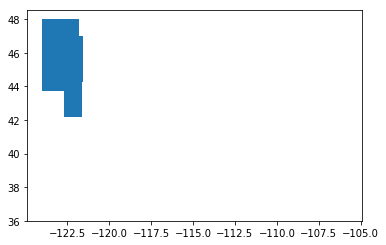

In [85]:
gdf.plot()

In [63]:
gdf = gdf.loc[~gdf.geometry.isnull()]

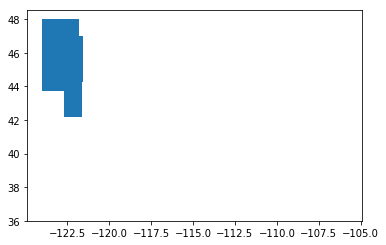

In [64]:
gdf.plot()

In [65]:
gdf.to_file('../data/interim/hj_andrews_plots.shp')

In [68]:
gdf.columns

Index(['DBCODE', 'LOCATION_CODE', 'KEYWORD_NAME', 'WEST_BOUND_COORD_decdeg',
       'EAST_BOUND_COORD_decdeg', 'NORTH_BOUND_COORD_decdeg',
       'SOUTH_BOUND_COORD_decdeg', 'ELEVATION_MAX_meters',
       'ELEVATION_MIN_meters', 'SLOPE_percent', 'ASPECT_degrees', 'geometry'],
      dtype='object')

In [75]:
mycols = ['WEST_BOUND_COORD_decdeg',
       'EAST_BOUND_COORD_decdeg', 'NORTH_BOUND_COORD_decdeg',
       'SOUTH_BOUND_COORD_decdeg']
print(gdf[mycols].head(1))


   WEST_BOUND_COORD_decdeg  EAST_BOUND_COORD_decdeg  NORTH_BOUND_COORD_decdeg  \
0              -122.258821              -122.256948                 44.202968   

   SOUTH_BOUND_COORD_decdeg  
0                  44.20177  


In [84]:
list(gdf.geometry.iloc[0].exterior.coords)

[(-122.25882057, 44.20177046),
 (-122.25882057, 44.2029685),
 (-122.25694806, 44.2029685),
 (-122.25694806, 44.20177046),
 (-122.25882057, 44.20177046)]

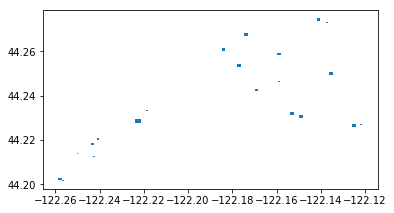

In [86]:
good_plots = gpd.read_file('../data/interim/hj_andrews_good_plots.shp')
good_plots.plot()

In [87]:
len(good_plots)

21

In [ ]:
if file_type == 'shp':
    df = gpd.read_file...
elif file_type == 'csv':
    df = pd.read_file...
    
df[cols] == [my list of columsn]